In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
accidents_df = pd.read_excel(file_path, sheet_name='Accidents')
findings_df = pd.read_excel(file_path, sheet_name='Findings')

# Filtering accidents in Alaska and in the United States (excluding Alaska and Hawaii)
# Also filtering for 'FatalInjuries' > 0 and 'SeriousInjuries' > 0

# Alaska accidents
alaska_accidents = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska') & 
                                ((accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0))]

# US accidents (excluding Alaska and Hawaii)
us_accidents = accidents_df[(accidents_df['Country'] == 'United States') & 
                            (accidents_df['StateOrRegion'] != 'Alaska') & 
                            (accidents_df['StateOrRegion'] != 'Hawaii') & 
                            ((accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0))]

# Count of accidents
alaska_accidents_count = len(alaska_accidents)
us_accidents_count = len(us_accidents)

# Merging the accidents data with the findings data based on MKey, for both Alaska and US accidents
alaska_findings = pd.merge(alaska_accidents, findings_df, on='MKey')
us_findings = pd.merge(us_accidents, findings_df, on='MKey')

# Dropping duplicate MKey for each unique Category for both Alaska and US
alaska_unique_categories = alaska_findings.drop_duplicates(subset=['MKey', 'Category'])
us_unique_categories = us_findings.drop_duplicates(subset=['MKey', 'Category'])

# Count of each category for Alaska and US
category_counts_alaska = alaska_unique_categories['Category'].value_counts()
category_counts_us = us_unique_categories['Category'].value_counts()

# Calculating percentages
category_percentage_alaska = (category_counts_alaska / alaska_accidents_count) * 100
category_percentage_us = (category_counts_us / us_accidents_count) * 100

# Creating a DataFrame for plotting
categories_comparison_df = pd.DataFrame({'Alaska': category_percentage_alaska, 'US': category_percentage_us}).fillna(0)

In [2]:
def plot_section_comparison(category_name, subcategory_name, alaska_data, us_data, alaska_total_accidents, us_total_accidents):
    """
    Plots a comparison of sections within a given subcategory of a category for Alaska and US accidents.

    :param category_name: The name of the category to analyze.
    :param subcategory_name: The name of the subcategory to analyze.
    :param alaska_data: DataFrame containing Alaska accidents with findings.
    :param us_data: DataFrame containing US accidents with findings.
    :param alaska_total_accidents: Total number of accidents in Alaska.
    :param us_total_accidents: Total number of accidents in the US.
    """
    # Filtering sections for the given category and subcategory for both Alaska and US
    alaska_sections = alaska_data[(alaska_data['Category'] == category_name) & 
                                  (alaska_data['Subcategory'] == subcategory_name)]
    us_sections = us_data[(us_data['Category'] == category_name) & 
                          (us_data['Subcategory'] == subcategory_name)]

    # Dropping duplicates to avoid double counting
    alaska_sections_unique = alaska_sections.drop_duplicates(subset=['MKey', 'Section'])
    us_sections_unique = us_sections.drop_duplicates(subset=['MKey', 'Section'])

    # Count of each section
    section_counts_alaska = alaska_sections_unique['Section'].value_counts()
    section_counts_us = us_sections_unique['Section'].value_counts()

    # Calculating percentages
    section_percentage_alaska = (section_counts_alaska / alaska_total_accidents) * 100
    section_percentage_us = (section_counts_us / us_total_accidents) * 100

    # Creating a DataFrame for plotting
    sections_comparison_df = pd.DataFrame({'Alaska': section_percentage_alaska, 'US': section_percentage_us}).fillna(0)

    # Plotting the data as side by side bars on a bar chart
    sections_comparison_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f'{category_name} > {subcategory_name}')
    plt.xlabel('Section')
    plt.ylabel('Percentage of Total Accidents')
    plt.xticks(rotation=45)
    plt.legend(title='Region')
    plt.grid(axis='y')

    plt.show()


In [3]:
def plot_subsection_comparison(category_name, subcategory_name, section_name, alaska_data, us_data, alaska_total_accidents, us_total_accidents):
    """
    Plots a comparison of subsections within a given section of a subcategory of a category for Alaska and US accidents.

    :param category_name: The name of the category to analyze.
    :param subcategory_name: The name of the subcategory to analyze.
    :param section_name: The name of the section to analyze.
    :param alaska_data: DataFrame containing Alaska accidents with findings.
    :param us_data: DataFrame containing US accidents with findings.
    :param alaska_total_accidents: Total number of accidents in Alaska.
    :param us_total_accidents: Total number of accidents in the US.
    """
    # Filtering subsections for the given category, subcategory, and section for both Alaska and US
    alaska_subsections = alaska_data[(alaska_data['Category'] == category_name) & 
                                     (alaska_data['Subcategory'] == subcategory_name) & 
                                     (alaska_data['Section'] == section_name)]
    us_subsections = us_data[(us_data['Category'] == category_name) & 
                             (us_data['Subcategory'] == subcategory_name) & 
                             (us_data['Section'] == section_name)]

    # Dropping duplicates to avoid double counting
    alaska_subsections_unique = alaska_subsections.drop_duplicates(subset=['MKey', 'Subsection'])
    us_subsections_unique = us_subsections.drop_duplicates(subset=['MKey', 'Subsection'])

    # Count of each subsection
    subsection_counts_alaska = alaska_subsections_unique['Subsection'].value_counts()
    subsection_counts_us = us_subsections_unique['Subsection'].value_counts()

    # Calculating percentages
    subsection_percentage_alaska = (subsection_counts_alaska / alaska_total_accidents) * 100
    subsection_percentage_us = (subsection_counts_us / us_total_accidents) * 100

    # Creating a DataFrame for plotting
    subsections_comparison_df = pd.DataFrame({'Alaska': subsection_percentage_alaska, 'US': subsection_percentage_us}).fillna(0)

    # Plotting the data as side by side bars on a bar chart
    subsections_comparison_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f'{category_name} > {subcategory_name} > {section_name}')
    plt.xlabel('Subsection')
    plt.ylabel('Percentage of Total Accidents')
    plt.xticks(rotation=45)
    plt.legend(title='Region')
    plt.grid(axis='y')

    plt.show()

# Example usage of the function
# This is an example, please replace the arguments with valid category, subcategory, and section names from your data

In [4]:
def plot_modifier_comparison(category_name, subcategory_name, section_name, subsection_name, alaska_data, us_data, alaska_total_accidents, us_total_accidents):
    """
    Plots a comparison of modifiers within a given subsection of a section of a subcategory of a category for Alaska and US accidents.

    :param category_name: The name of the category to analyze.
    :param subcategory_name: The name of the subcategory to analyze.
    :param section_name: The name of the section to analyze.
    :param subsection_name: The name of the subsection to analyze.
    :param alaska_data: DataFrame containing Alaska accidents with findings.
    :param us_data: DataFrame containing US accidents with findings.
    :param alaska_total_accidents: Total number of accidents in Alaska.
    :param us_total_accidents: Total number of accidents in the US.
    """
    # Filtering modifiers for the given category, subcategory, section, and subsection for both Alaska and US
    alaska_modifiers = alaska_data[(alaska_data['Category'] == category_name) & 
                                   (alaska_data['Subcategory'] == subcategory_name) & 
                                   (alaska_data['Section'] == section_name) &
                                   (alaska_data['Subsection'] == subsection_name)]
    us_modifiers = us_data[(us_data['Category'] == category_name) & 
                           (us_data['Subcategory'] == subcategory_name) & 
                           (us_data['Section'] == section_name) &
                           (us_data['Subsection'] == subsection_name)]

    # Dropping duplicates to avoid double counting
    alaska_modifiers_unique = alaska_modifiers.drop_duplicates(subset=['MKey', 'ModifierName'])
    us_modifiers_unique = us_modifiers.drop_duplicates(subset=['MKey', 'ModifierName'])

    # Count of each modifier
    modifier_counts_alaska = alaska_modifiers_unique['ModifierName'].value_counts()
    modifier_counts_us = us_modifiers_unique['ModifierName'].value_counts()

    # Calculating percentages
    modifier_percentage_alaska = (modifier_counts_alaska / alaska_total_accidents) * 100
    modifier_percentage_us = (modifier_counts_us / us_total_accidents) * 100

    # Creating a DataFrame for plotting
    modifiers_comparison_df = pd.DataFrame({'Alaska': modifier_percentage_alaska, 'US': modifier_percentage_us}).fillna(0)

    # Plotting the data as side by side bars on a bar chart
    modifiers_comparison_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f'{category_name} > {subcategory_name} > {section_name} > {subsection_name}')
    plt.xlabel('ModifierName')
    plt.ylabel('Percentage of Total Accidents')
    plt.xticks(rotation=45)
    plt.legend(title='Region')
    plt.grid(axis='y')

    plt.show()

# Example usage of the function
# Please replace the arguments with valid category, subcategory, section, and subsection names from your data
# plot_modifier_comparison("YourCategoryName", "YourSubcategoryName", "YourSectionName", "YourSubsectionName", alaska_unique_categories, us_unique_categories, count_alaska_accidents, count_us_accidents)

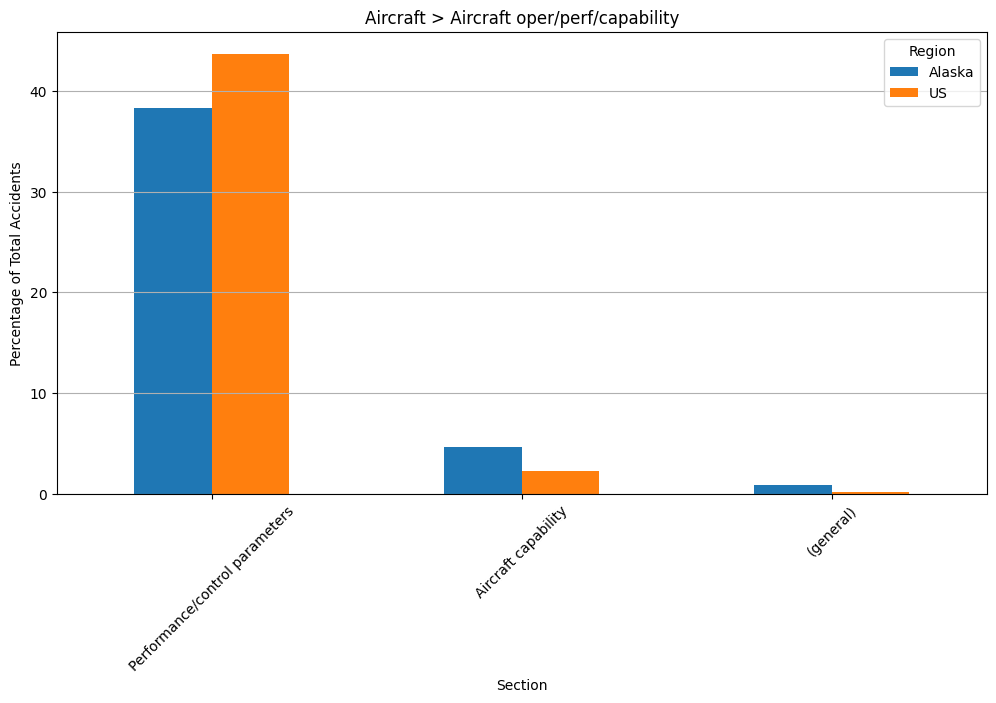

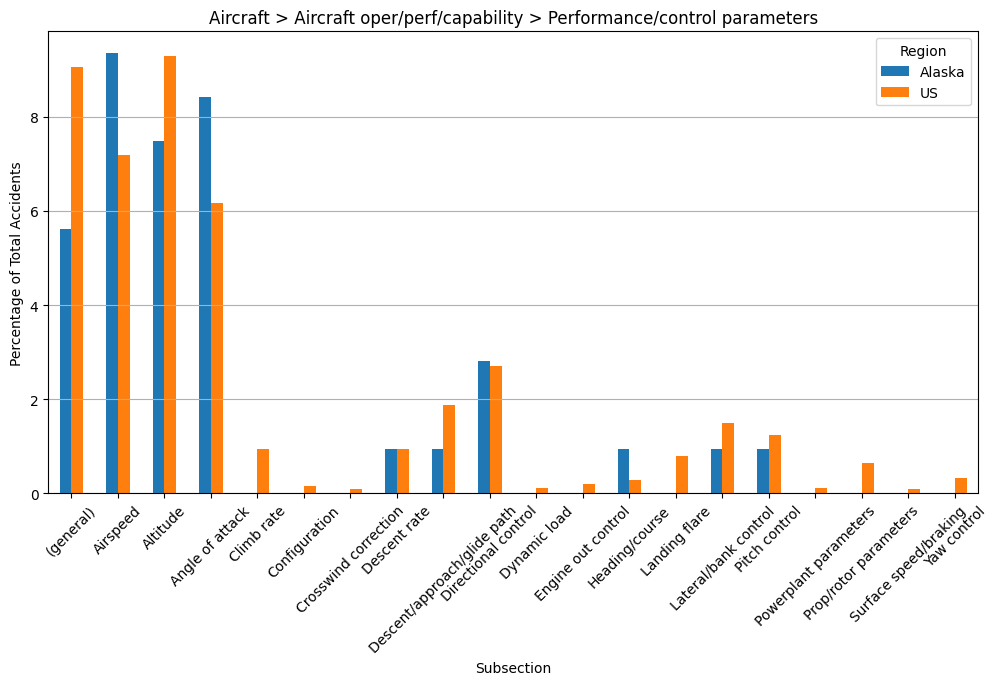

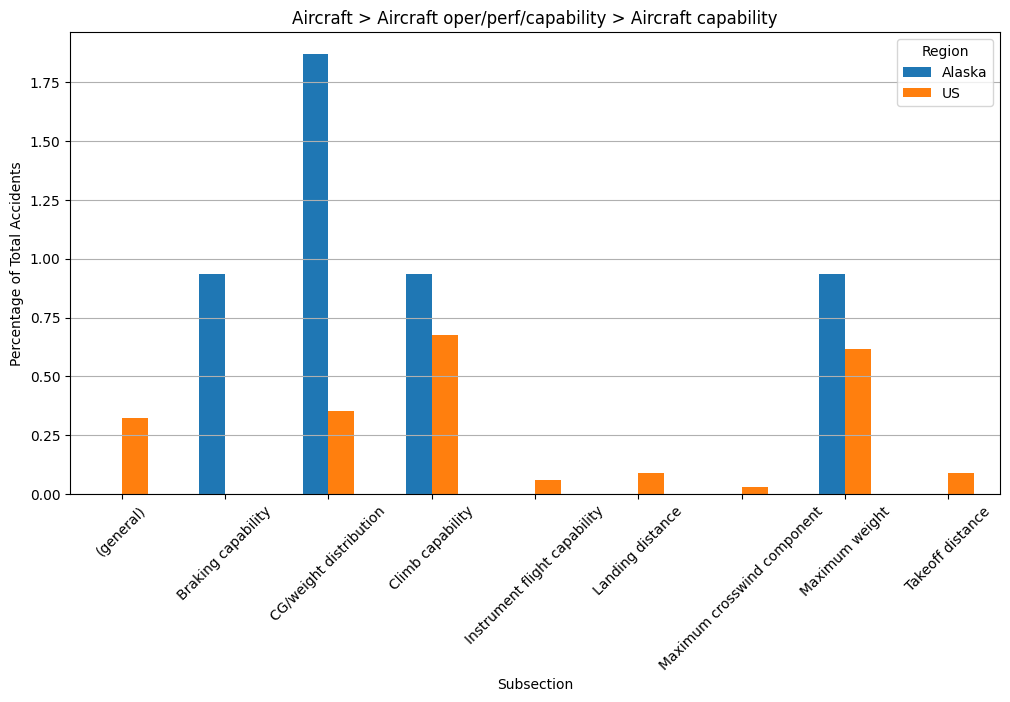

In [5]:
# Select Stuff
subCategory = 'Aircraft'
section = 'Aircraft oper/perf/capability'
plot_section_comparison(subCategory, section, alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)
subSection = 'Performance/control parameters'
plot_subsection_comparison(subCategory, section, subSection, alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)
# modifier = 'Angle of attack'
# plot_modifier_comparison(subCategory, section, subSection, modifier, alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)
subSection = 'Aircraft capability'
plot_subsection_comparison(subCategory, section, subSection, alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)
# modifier = 'CG/weight distribution'
# plot_modifier_comparison(subCategory, section, subSection, modifier, alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)

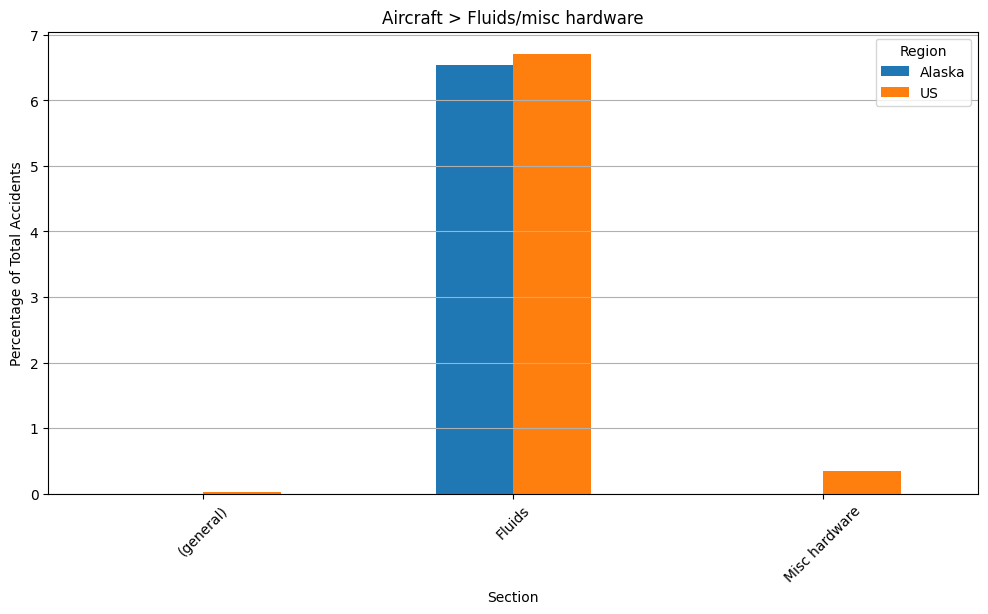

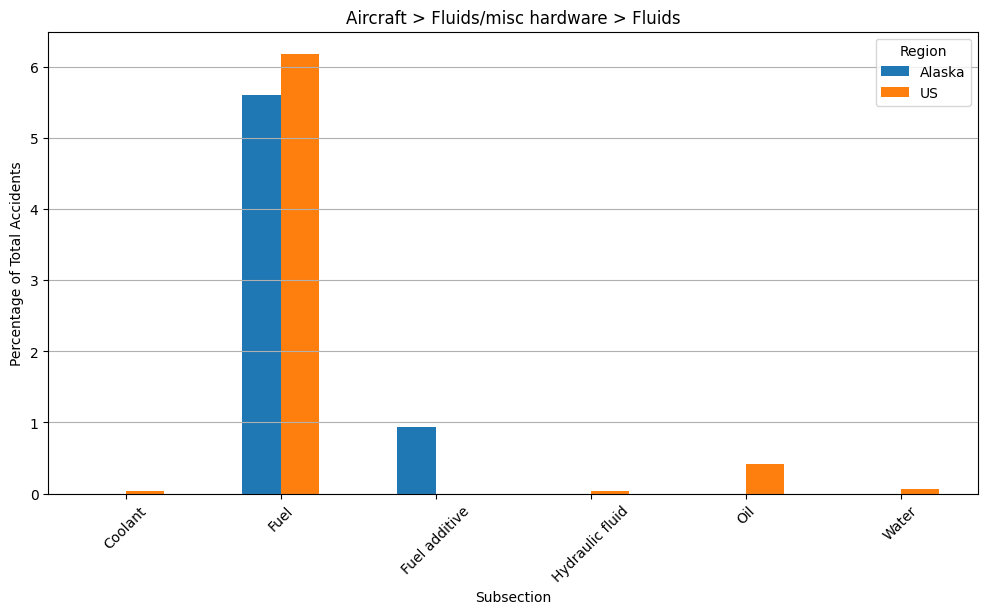

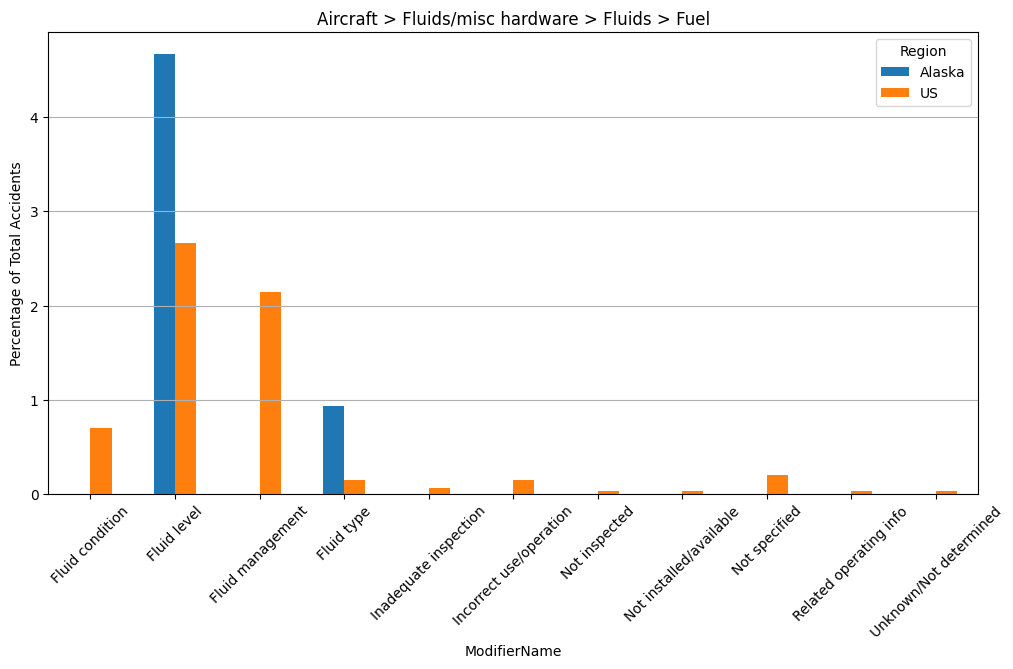

In [6]:
# Select Stuff
subCategory = 'Aircraft'
section = 'Fluids/misc hardware'
subSection = 'Fluids'
modifier = 'Fuel'

plot_section_comparison(subCategory, section, alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)
plot_subsection_comparison(subCategory, section, subSection, alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)
plot_modifier_comparison(subCategory, section, subSection, modifier, alaska_unique_categories, us_unique_categories, alaska_accidents_count, us_accidents_count)